In [1]:
import numpy as np
import pandas as pd
import matplotlib
import thinkstats2
import thinkplot
import sys
import os
import re
import collections
import nsfg
import math

%matplotlib inline

In [2]:
"""This is a Jupyter Notebook that will house the answers to the statistics section
for Metis Datascience Prework on Statistics"""

'This is a Jupyter Notebook that will house the answers to the statistics section\nfor Metis Datascience Prework on Statistics'

In [3]:
import first # this is module for the second chapter of the ThinkStats2 text

In [4]:
preg = nsfg.ReadFemPreg() # assign var preg to be a ReadFemPreg obj which is a DF
print(type(preg))
live = preg[preg.outcome == 1] # 1 is live birth, 0 is still birth
print(type(live))
# preg.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [5]:
# live.head() # this is a DataFrame object - can call index, values, or other df methods

In [6]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [7]:
# Exercise 2.4 Using the variable totalwgt_lb, investigate whether first ba- bies are 
# lighter or heavier than others. Compute Cohen’s d to quantify the difference between 
# the groups. How does it compare to the difference in pregnancy length?
# we need to run first and other for prglngth and for totalwgt_lb - comparing these
# We will run data for totalwgt_lb first
first_weight = firsts.totalwgt_lb
first_weight_mean = first_weight.mean()
first_weight_var = first_weight.var()
first_weight_std = first_weight.std()
first_weight_obs = len(first_weight)
other_weight = others.totalwgt_lb
other_weight_mean = other_weight.mean()
other_weight_var = other_weight.var()
other_weight_std = other_weight.std()
other_weight_obs = len(other_weight)
first_weight_mean, other_weight_mean, (first_weight_mean - other_weight_mean)




(7.201094430437772, 7.325855614973262, -0.12476118453549034)

In [8]:
def cohens(x, y): # function for cohensEffectSize
    diff = (x.mean() - y.mean())
    varx = x.var()
    vary = y.var()
    n1, n2 = len(x), len(y)
    pooling_variance = (n1 * varx + n2 * vary)/(n1 + n2) # need pooled var for pooled stdev
    cohen_diff = diff / math.sqrt(pooling_variance)
    return cohen_diff

In [9]:
cdiff = cohens(first_weight, other_weight)
cohens(first_weight, other_weight)

-0.088672927072602

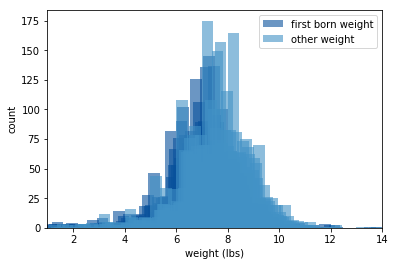

In [10]:
first_weight_hist = thinkstats2.Hist(first_weight, label='first born weight')
other_weight_hist = thinkstats2.Hist(other_weight, label='other weight')

thinkplot.PrePlot(2)
thinkplot.Hist(first_weight_hist, align='right', width=0.45)
thinkplot.Hist(other_weight_hist, align='left', width=0.45)
thinkplot.Config(xlabel='weight (lbs)', ylabel='count', xlim=[1, 14]) # legen as a var doesn't work I guess


In [11]:
# Now for prglngth
first_length = firsts.prglngth
others_length = others.prglngth
cohens(first_length, others_length)

0.028879044654449883

In [12]:
first_length.mean(), others_length.mean(), (first_length.mean() - others_length.mean())

(38.60095173351461, 38.52291446673706, 0.07803726677754952)

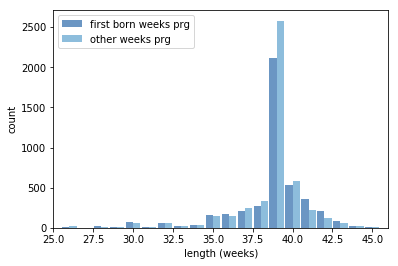

In [13]:
first_length_hist = thinkstats2.Hist(first_length, label='first born weeks prg')
other_length_hist = thinkstats2.Hist(others_length, label='other weeks prg')

thinkplot.PrePlot(2)
thinkplot.Hist(first_length_hist, align='right', width=0.45)
thinkplot.Hist(other_length_hist, align='left', width=0.45)
thinkplot.Config(xlabel='length (weeks)', ylabel='count', xlim=[25, 46]) # legen as a var doesn't work I guess



In [75]:
"""QUESTION 2.4: This is a question about size effect and the difference between groups.  From the data
it appears that with weight, the second baby tends to be about (converting .125 to oz) about
2 oz heavier than the first born child.  The cohen d, measuring the difference in means is
rounded -0.09 standard deviations, which seems quite small.  This matches the findings with
length of pregnancy in that length differs by about .078 weeks so * 7 for days and * 24 for hours 
gets about a 12.5 hour difference between first and second.  The cohen d is only .0288 
standard deviations difference which is very small as well."""

'QUESTION 2.4: This is a question about size effect and the difference between groups.  From the data\nit appears that with weight, the second baby tends to be about (converting .125 to oz) about\n2 oz heavier than the first born child.  The cohen d, measuring the difference in means is\nrounded -0.09 standard deviations, which seems quite small.  This matches the findings with\nlength of pregnancy in that length differs by about .078 weeks so * 7 for days and * 24 for hours \ngets about a 12.5 hour difference between first and second.  The cohen d is only .0288 \nstandard deviations difference which is very small as well.'

In [70]:
# This problem presents a robust example of actual vs biased data. As a data scientist, 
# it will be important to examine not only the data that is available, but also the data 
# that may be missing but highly relevant. You will see how the absence of this relevant 
# data will bias a dataset, its distribution, and ultimately, its statistical interpretation.
# 3.1 Actual vs. Biased with number of children in a family.  Create an actual distribution
# for number of children in a house under 18 with NSFG NUMKDHH variable.  Then compute the
# biased distribution for the same group.  Plotting actual vs. biased distributions, and their
# means.

In [71]:
# create a function for a biased distribution, the PMF for the actual data set is our other
# datapoint
# utilizing thinkstats here...
def biasedpmf(pmf, label):
    new_pmf = pmf.Copy(label=label) # MAKE A COPY OF THE ACTUAL PMF
    
    for key, var in pmf.Items(): # I don't like using this books functions
        new_pmf.Mult(key, key)
        
    new_pmf.Normalize() # make sure everything sums to one still
    return new_pmf

In [72]:
resp = nsfg.ReadFemResp() # READFEMALE RESPONSES, NOT PREG DATA
pmf = thinkstats2.Pmf(resp.numkdhh, label='Number of kids in home (numkdhh)') # assign actual PMF

In [73]:
biased_num_kids_pmf = biasedpmf(pmf, label='biased')
# First will just print the means
pmf.Mean(), biased_num_kids_pmf.Mean()

(1.0242051550438309, 2.4036791006642821)

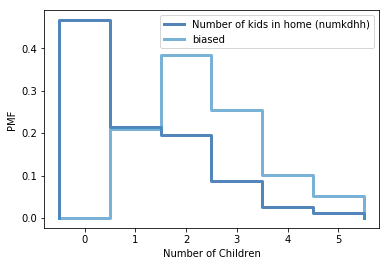

In [74]:
thinkplot.PrePlot(2) # we are going to plot 2 pmfs # PMF TAKES 1 ARG, so list
thinkplot.Pmfs([pmf, biased_num_kids_pmf])
thinkplot.Config(xlabel='Number of Children', ylabel='PMF')

In [76]:
"""Question 3.1 The biased PMF illustrates the general concept of the actual data bias for people to 
respond if there are people in the family vs not responding if people are not.  The biased
PMF maps closer to the normal average number of kids in the household"""

'Question 3.1 The biased PMF illustrates the general concept of the actual data bias for people to \nrespond if there are people in the family vs not responding if people are not.  The biased\nPMF maps closer to the normal average number of kids in the household'

In [21]:
"""Exercise 4.2 The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?"""

'Exercise 4.2 The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.\nGenerate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?'

In [22]:
"""This questions asks you to examine the function that produces random numbers. Is it really random? A good way to test that is to examine the pmf and cdf of the list of random numbers and visualize the distribution. If you're not sure what pmf is, read more about it in Chapter 3."""

"This questions asks you to examine the function that produces random numbers. Is it really random? A good way to test that is to examine the pmf and cdf of the list of random numbers and visualize the distribution. If you're not sure what pmf is, read more about it in Chapter 3."

In [23]:
random_nums = np.random.random(1000) # create random nums 1000 times
random_nums_pmf = thinkstats2.Pmf(random_nums) # assign PMF
random_nums_cdf = thinkstats2.Cdf(random_nums) # assing CDF

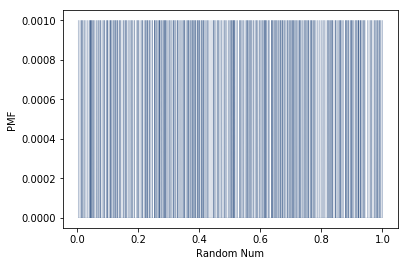

In [24]:
thinkplot.Pmf(random_nums_pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random Num', ylabel='PMF')

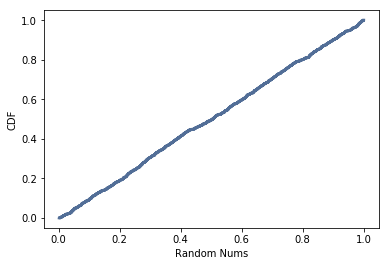

In [25]:
thinkplot.Cdf(random_nums_cdf)
thinkplot.Config(xlabel='Random Nums', ylabel='CDF')

{'xscale': 'linear', 'yscale': 'linear'}

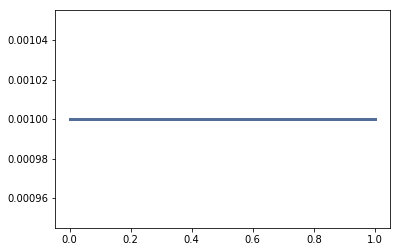

In [26]:
thinkplot.Cdf(random_nums_pmf)

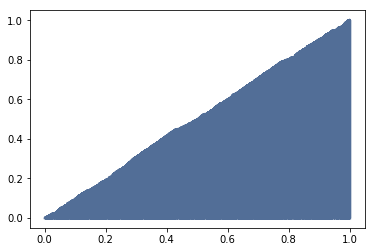

In [27]:
thinkplot.Pmf(random_nums_cdf)

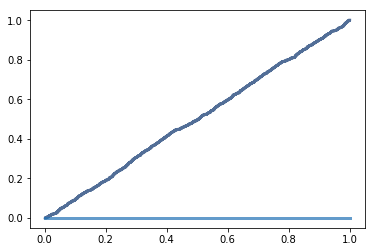

In [28]:
thinkplot.Cdfs([random_nums_cdf, random_nums_pmf])

In [29]:
len(random_nums_cdf)

1000

In [77]:
"""Question 4.2 PMFs tell us the probability that a item in the distribution IS a certain value, where a CDF 
tells us the probability (of sorts, percentile really) that a value is <= a certain value.
This random number generator isn't really random - it assigns as 1/N
probabilty to each number in the distribution - in this case thinkplot.Cdf(random_nums_pmf)
shows this value."""

"Question 4.2 PMFs tell us the probability that a item in the distribution IS a certain value, where a CDF \ntells us the probability (of sorts, percentile really) that a value is <= a certain value.\nThis random number generator isn't really random - it assigns as 1/N\nprobabilty to each number in the distribution - in this case thinkplot.Cdf(random_nums_pmf)\nshows this value."

In [31]:
"""Exercise 5.1 In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163 cm and σ = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf."""

'Exercise 5.1 In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163 cm and σ = 7.3 cm for women.\nIn order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.'

In [ ]:
# Modeling Distributions - we are given mu = 178 and sigma = 7.7 for me - for the normal population
# but to join the blue man group you must be between 5/10// to 6/1//

In [36]:
import scipy.stats as stats
mu = 178
sigma = 7.7

In [37]:
def feet_to_cm(ft, inch):
    cm_in_ft = 30.48
    inches_to_cm = (inch/12.0)
    feet_to_cm = (ft + inches_to_cm) * cm_in_ft
    return feet_to_cm

In [38]:
feet_to_cm(5, 10)

177.79999999999998

In [46]:
normal = stats.norm(mu, sigma) # Makes a normal distribution using mu and sigma with scipy and
                               # assigns to normal, normal can call the scipy functions now
                               # though I know very little about this at this point.
normal.mean(), normal.var(), normal.std(), type(normal)

(178.0,
 59.290000000000006,
 7.7000000000000002,
 scipy.stats._distn_infrastructure.rv_frozen)

In [56]:
print(dir(normal), end=' ') # METHODS FOR SCIPY NORMAL

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'a', 'args', 'b', 'cdf', 'dist', 'entropy', 'expect', 'interval', 'isf', 'kwds', 'logcdf', 'logpdf', 'logpmf', 'logsf', 'mean', 'median', 'moment', 'pdf', 'pmf', 'ppf', 'random_state', 'rvs', 'sf', 'stats', 'std', 'var'] 

In [57]:
blue_height_min = feet_to_cm(5, 10)
blue_height_max = feet_to_cm(6, 1)

In [58]:
normal.cdf(mu-sigma) # % of people more than 1 stdv below the mean 178, 15.8%

0.15865525393145741

In [59]:
normal.cdf(mu+sigma) # % of people less than one stdv above the mean 178, 84.1%

0.84134474606854259

In [60]:
normal.cdf(mu+sigma) - normal.cdf(mu-sigma)# should be 1 stdv diff

0.68268949213708519

In [61]:
normal.cdf(mu+2*sigma) - normal.cdf(mu-2*sigma) # 2 stdev

0.9544997361036418

In [62]:
normal.cdf(mu+3*sigma) - normal.cdf(mu-3*sigma) # 3 stdev

0.99730020393673979

In [63]:
normal.cdf(blue_height_min), normal.cdf(blue_height_max), normal.cdf(blue_height_max) - normal.cdf(blue_height_min)

(0.48963902786483121, 0.83238586549630633, 0.34274683763147512)

In [67]:
(normal.cdf(mu+sigma) - normal.cdf(mu-sigma)) - (normal.cdf(blue_height_max)-normal.cdf(blue_height_min))

0.33994265450561006

In [78]:
'''Question 5.1 To answer, ~34.275% of the adult male population could be in the blueman group, their
lower end range is quite a bit higher than the first stdev from the mean to the smaller
height, but about in line with the upper bound for the stdev. I guess they are technically
removing 34% of a single stdev from the mean from their population. But anyone only people 
inside one stdev of the mean can be in blueman group.'''

'Question 5.1 To answer, ~34.275% of the adult male population could be in the blueman group, their\nlower end range is quite a bit higher than the first stdev from the mean to the smaller\nheight, but about in line with the upper bound for the stdev. I guess they are technically\nremoving 34% of a single stdev from the mean from their population. But anyone only people \ninside one stdev of the mean can be in blueman group.'